In [447]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [448]:
df = pd.read_csv("dataset.csv")
print(len(df))

540364


In [449]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'datetime', 'hour', 'minute',
       'second', 'relative_time', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

In [450]:
df['datetime'] = pd.to_datetime(df.datetime )
df = df.sort_values(by='datetime')
def create_year_column(row):
    if row['datetime'].year == 2017:
        return 2017
    else:
        return 2016

df['year'] = df.apply(create_year_column, axis=1)

In [451]:
def generate_combined_boxplots(dataframe):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle('Dense Histograms')
    sns.boxplot(ax=axes[0,0],x="heatindex", data=dataframe)
    sns.boxplot(ax=axes[0,1],x="mean_temp_day", data=dataframe)
    sns.boxplot(ax=axes[0,2],x="temperature", data=dataframe)
    sns.boxplot(ax=axes[1,0],x="relative_humidity", data=dataframe)
    sns.boxplot(ax=axes[1,1],x="light_sensor_one_wavelength", data=dataframe)
    sns.boxplot(ax=axes[1,2],x="light_sensor_two_wavelength", data=dataframe)

def compare_data(previous, current):
    previous_len = len(previous)
    current_len = len(current)

    part_of_whole_previous = (current_len/previous_len) * 100
    part_of_whole_df = (current_len/len(df)) * 100

    print(f"% data removed from the previous compared current = %{100 - part_of_whole_previous}")
    print(f"% data removed on the whole = %{100 - part_of_whole_df}")

<AxesSubplot:xlabel='room', ylabel='temperature'>

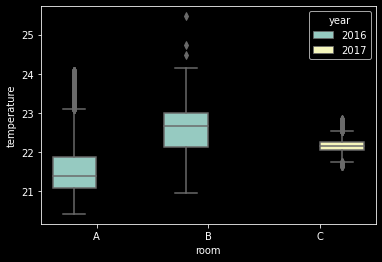

In [452]:
sns.boxplot(y="temperature", data=df, x="room", hue="year")

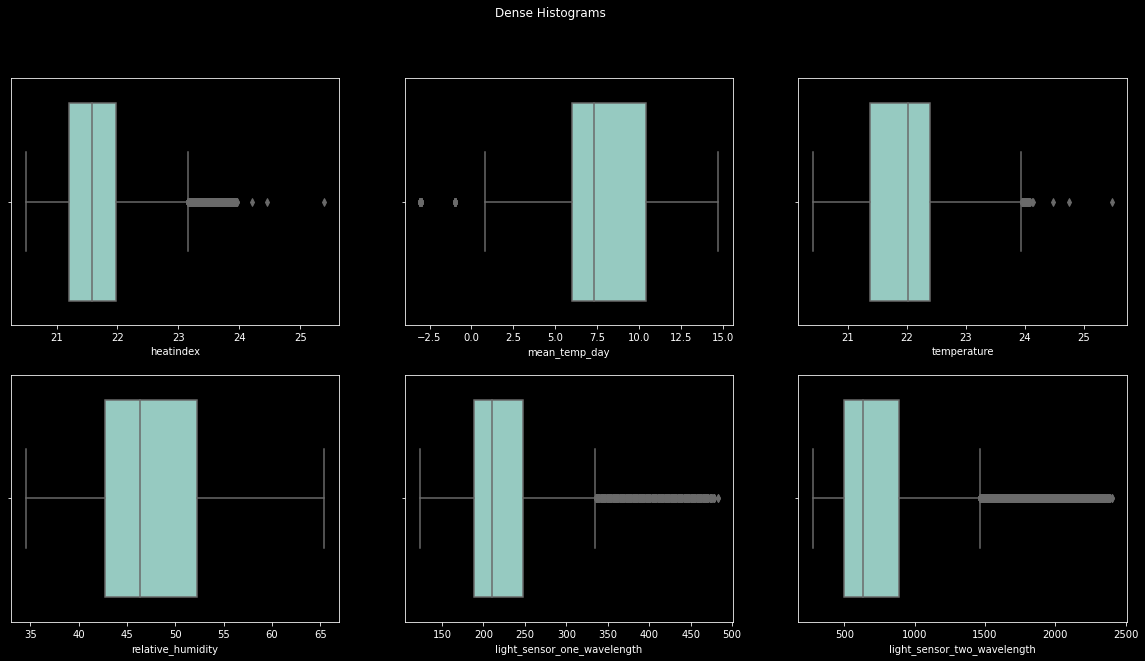

In [453]:
generate_combined_boxplots(df)

## Outlier removal temperature per room

In [454]:
below_24_degrees = df[df['temperature'] < 23.9]

<AxesSubplot:xlabel='room', ylabel='temperature'>

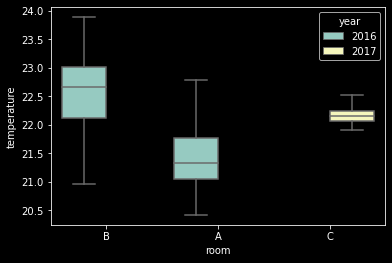

In [455]:
room_a = below_24_degrees[below_24_degrees.room == "A"]
below_23_degrees = room_a[room_a['temperature'] < 22.8]

room_c = below_24_degrees[below_24_degrees.room == "C"]
below_25_degrees = room_c[room_c['temperature'] < 22.53]
below_25_degrees = below_25_degrees[below_25_degrees['temperature'] > 21.9]

room_b = below_24_degrees[below_24_degrees.room == "B"]
frames = [room_b, below_23_degrees, below_25_degrees]

resulting_frame = pd.concat(frames)
sns.boxplot(y="temperature", data=resulting_frame, x="room", hue="year")

<AxesSubplot:xlabel='room', ylabel='temperature'>

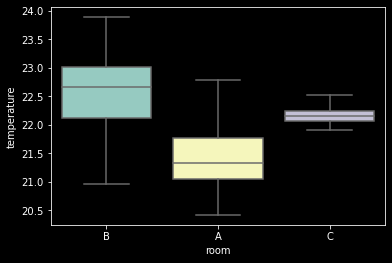

In [456]:
sns.boxplot(y="temperature", data=resulting_frame, x="room")

<AxesSubplot:ylabel='temperature'>

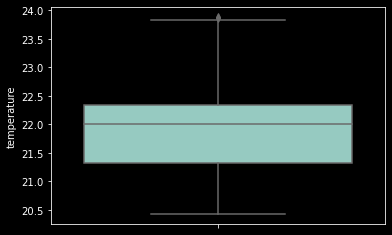

In [457]:
sns.boxplot(y="temperature", data=resulting_frame)

## Outlier removal temperature

In [458]:
results_temperature = resulting_frame[resulting_frame['temperature'] < 23.86]

In [459]:
compare_data(df, results_temperature)

% data removed from the previous compared current = %5.750012954230854
% data removed on the whole = %5.750012954230854


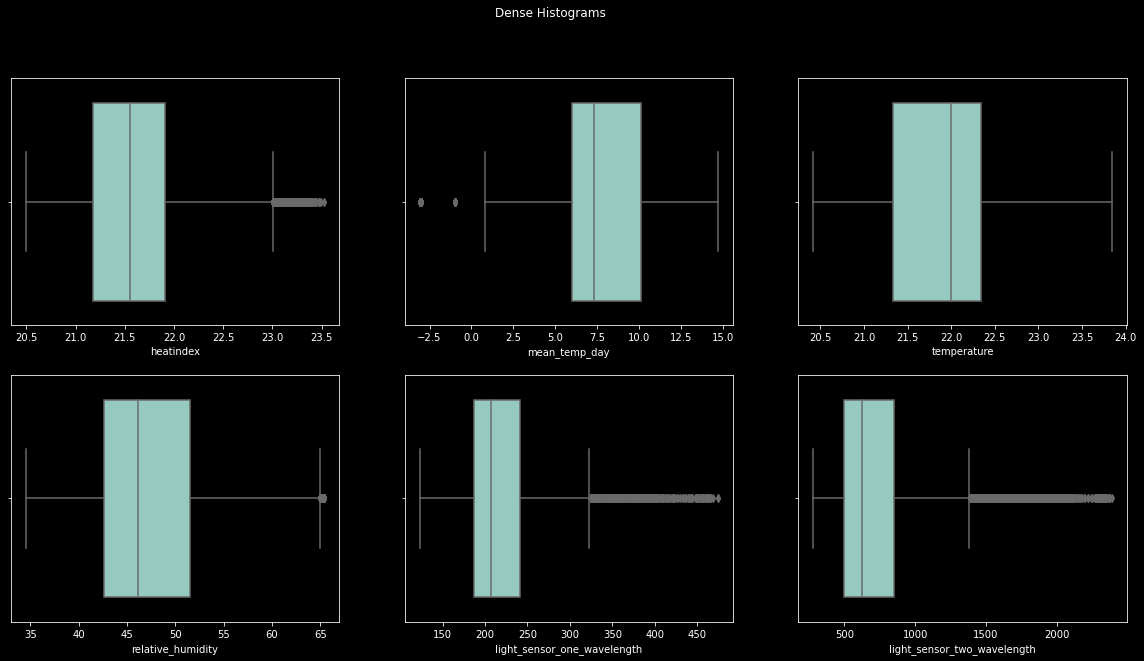

In [460]:
generate_combined_boxplots(results_temperature)

## Outlier removal humidity

In [461]:
results_humid = results_temperature[results_temperature['relative_humidity'] < 64.5]

<AxesSubplot:xlabel='relative_humidity'>

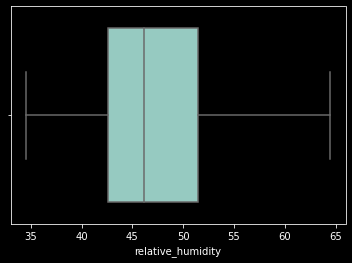

In [462]:
sns.boxplot(x="relative_humidity", data=results_humid)

In [463]:
compare_data(results_temperature, results_humid)

% data removed from the previous compared current = %0.300023758425894
% data removed on the whole = %6.032785307681493


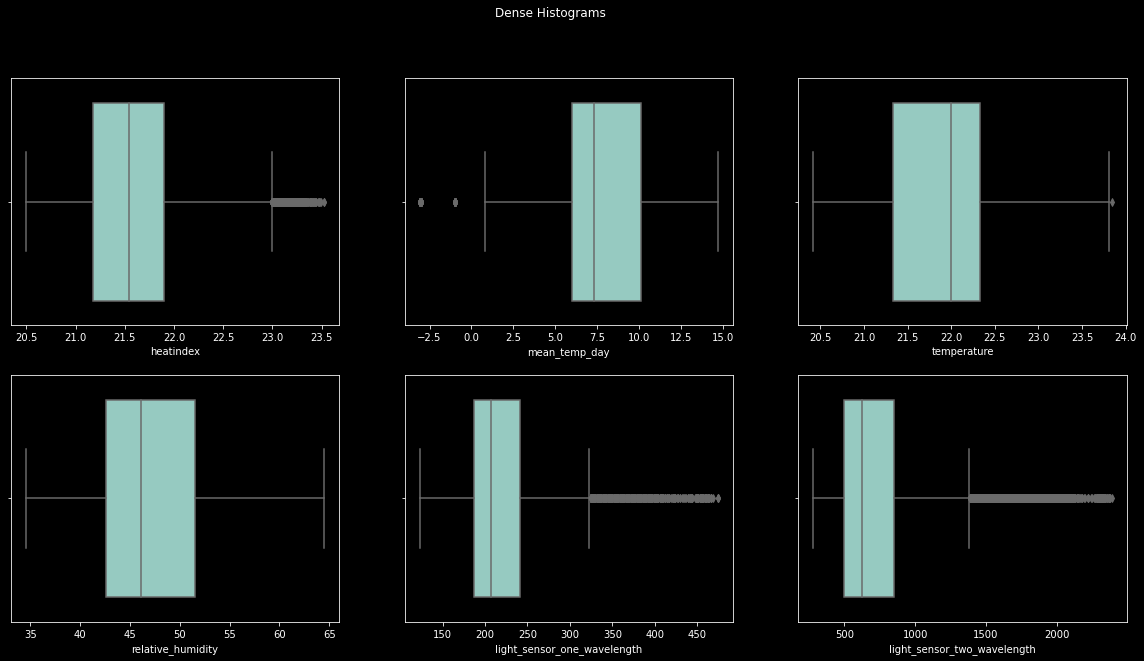

In [464]:
generate_combined_boxplots(results_humid)

## Outlier removal mean_temp_day

In [465]:
results_mean_temp = results_humid[results_humid['mean_temp_day'] > 00]

In [466]:
compare_data(results_humid, results_mean_temp)

% data removed from the previous compared current = %6.790739810739225
% data removed on the whole = %12.413854364835558


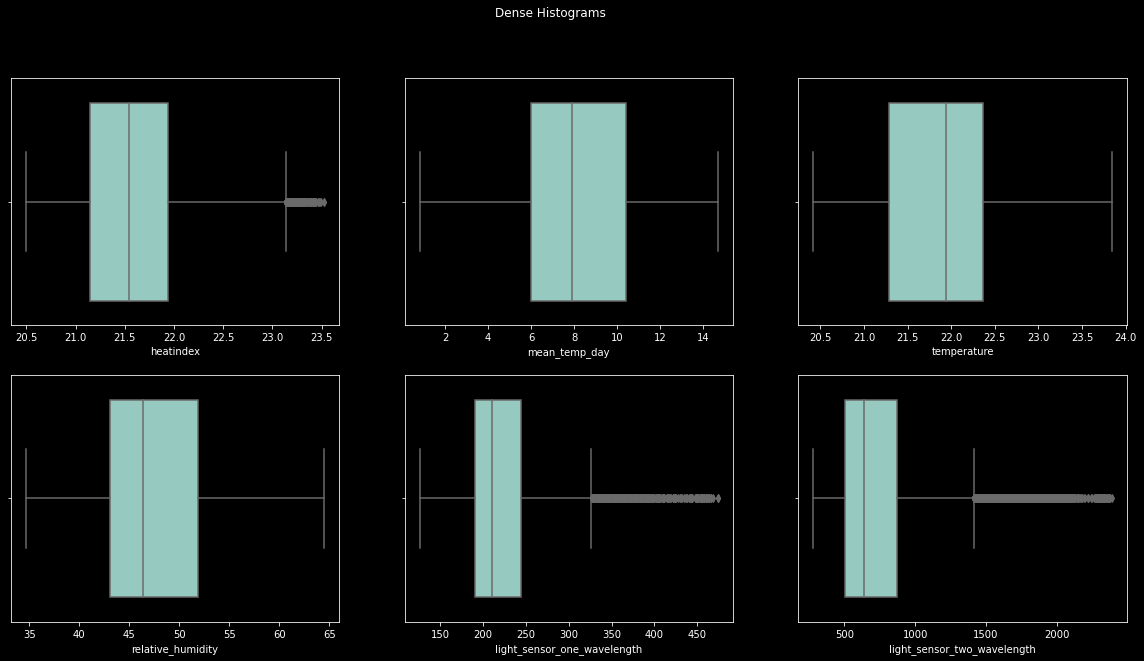

In [467]:
generate_combined_boxplots(results_mean_temp)

## Outlier removal heatindex

In [468]:
results_heatindex = results_mean_temp[results_mean_temp['heatindex'] < 23.13]

In [469]:
compare_data(results_mean_temp, results_heatindex)

% data removed from the previous compared current = %0.19354129867056713
% data removed on the whole = %12.58336972855335


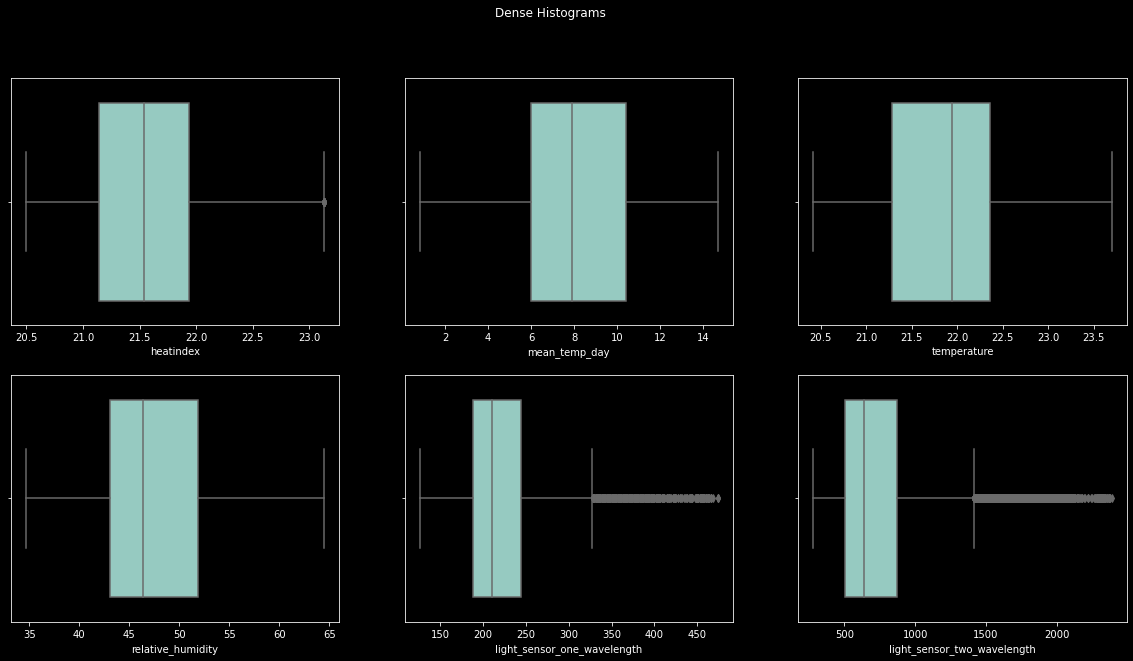

In [470]:
generate_combined_boxplots(results_heatindex)

## Outlier removal light_sensor_one_wavelength

In [471]:
results_light_sensor = results_heatindex[results_heatindex['light_sensor_one_wavelength'] < 287]

In [472]:
compare_data(results_heatindex, results_light_sensor)

% data removed from the previous compared current = %11.162060088744369
% data removed on the whole = %22.34086652700772


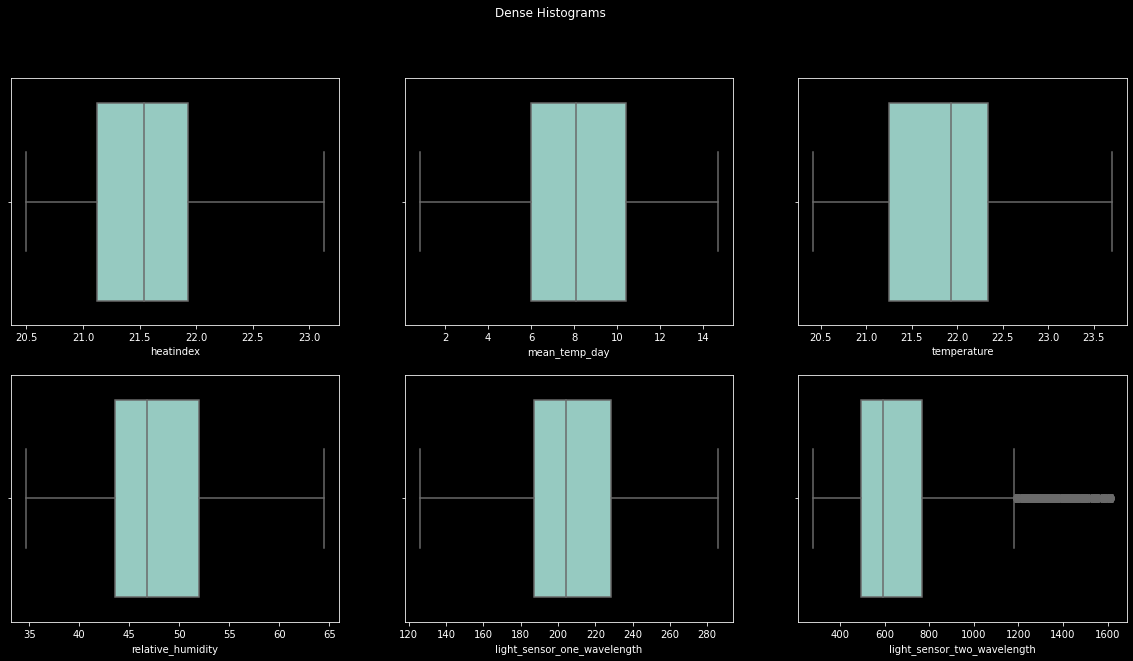

In [473]:
generate_combined_boxplots(results_light_sensor)

## Outlier removal light_sensor_two_wavelength

In [474]:
results_light_sensor_two = results_light_sensor[results_light_sensor['light_sensor_two_wavelength'] < 1110]

In [475]:
compare_data(results_light_sensor, results_light_sensor_two)

% data removed from the previous compared current = %4.709967067166772
% data removed on the whole = %25.998586138232753


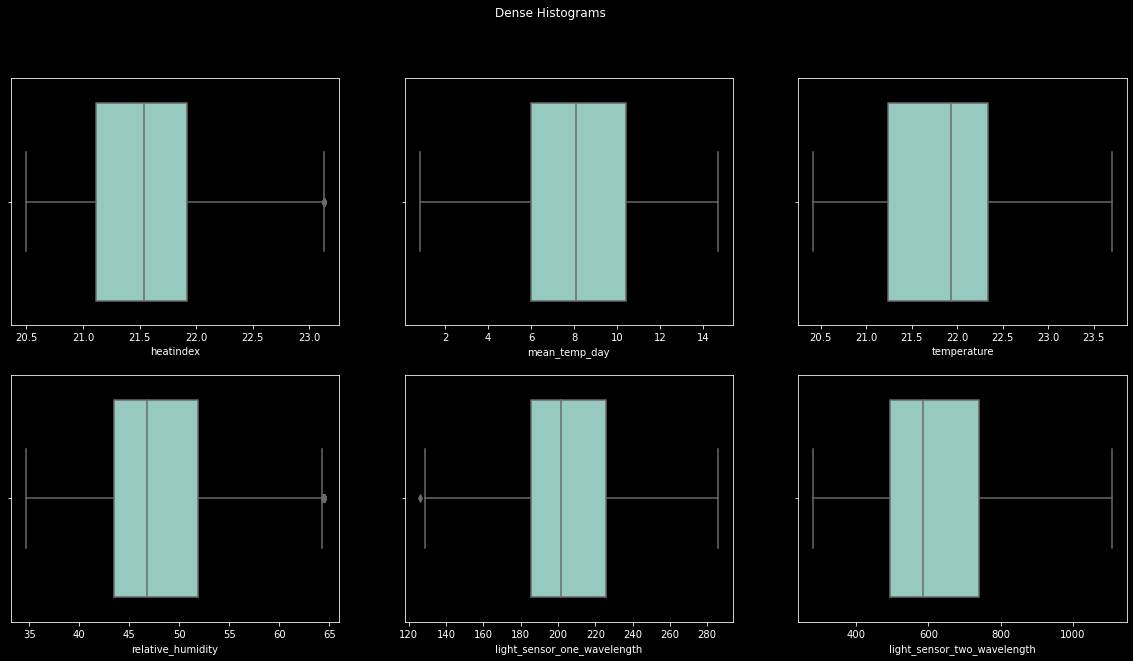

In [476]:
generate_combined_boxplots(results_light_sensor_two)

# Results
+ Removing any off the features results in  a large amount of our data being lost(6%, 12%, 25%) thus we have decided to not remove these in the curren version and if in future we want to use this outlier data we can.